In [66]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm, vhmm
import joblib

In [67]:
X_annotations = pd.pandas.read_csv("E:/UQAM/INF889E/projet/Recherche/Data/emotion_analyses/emotion_analyses/NOT_Lou_annotations.csv", header=None)
# pd.concat([X_annotations[[0]], X_annotations[1].str.split(', ', expand=True)], axis=1)


print(type(X_annotations))
print(len(X_annotations))
print(X_annotations[0][1])

new_columns = X_annotations[0].str.split(',', expand=True)

X_annotations[new_columns.columns] = new_columns

X_annotations = X_annotations.drop(columns=[0])
temps_annotation = X_annotations[[2, 11]].drop(X_annotations.index[0])
print(temps_annotation)
#X_annotations

<class 'pandas.core.frame.DataFrame'>
75
01-03-2024 10:44:30.038,01-03-2024,10:44:30,38,00:00:00.000,00:00:00,0,0,6.43333,Thomas_Coding_Lou_1Mar2024,Event log,No Object,State start
          2                      11
1   10:44:30              No Object
2   10:44:30        Eating/drinking
3   10:44:30                     No
4   10:44:30              No object
5   10:44:30       Ears not visible
..       ...                    ...
70  10:45:15  Not looking at object
71  10:45:15         No interaction
72  10:45:15       Resting/inactive
73  10:45:15                    Yes
74  10:45:15               >2 heads

[74 rows x 2 columns]


In [69]:
# Assuming 'time' and 'behavior' are the column names in your DataFrame
time_behavior_data = temps_annotation[[2, 11]]
print(time_behavior_data)

# Convert the 'behavior' column to numerical values if needed
label_encoder = LabelEncoder()

# Fit and transform the 'Behavior' column to numerical values
time_behavior_data[11] = label_encoder.fit_transform(temps_annotation[11])

#time_behavior_data.loc[:, 11] = pd.to_numeric(X_annotations[11], errors='coerce')
print(time_behavior_data)

model = hmm.MultinomialHMM(n_components=4) 
X = time_behavior_data[11].values.reshape(-1, 1)
print(X)
lengths = [len(X)]
model.fit(X, lengths)

# associate the behavior to the it's numerical transformation
# using dictionnary
dict_behavior = dict()

# Once the model is trained, you can use it for various HMM tasks such as predicting the most likely sequence of hidden states, etc.

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


          2                      11
1   10:44:30              No Object
2   10:44:30        Eating/drinking
3   10:44:30                     No
4   10:44:30              No object
5   10:44:30       Ears not visible
..       ...                    ...
70  10:45:15  Not looking at object
71  10:45:15         No interaction
72  10:45:15       Resting/inactive
73  10:45:15                    Yes
74  10:45:15               >2 heads

[74 rows x 2 columns]
          2   11
1   10:44:30   8
2   10:44:30   3
3   10:44:30   7
4   10:44:30  10
5   10:44:30   2
..       ...  ..
70  10:45:15  12
71  10:45:15   9
72  10:45:15  17
73  10:45:15  19
74  10:45:15   1

[74 rows x 2 columns]
[[ 8]
 [ 3]
 [ 7]
 [10]
 [ 2]
 [11]
 [13]
 [10]
 [15]
 [11]
 [12]
 [15]
 [ 1]
 [ 8]
 [ 9]
 [ 1]
 [ 0]
 [12]
 [ 5]
 [ 2]
 [ 4]
 [ 0]
 [ 1]
 [ 4]
 [16]
 [16]
 [ 4]
 [ 1]
 [ 0]
 [ 3]
 [18]
 [ 9]
 [ 6]
 [ 4]
 [16]
 [ 0]
 [ 1]
 [18]
 [17]
 [16]
 [ 4]
 [ 6]
 [ 9]
 [ 4]
 [ 2]
 [ 7]
 [19]
 [14]
 [ 2]
 [ 4]
 [ 4]
 [16]
 [16]


MultinomialHMM(n_components=4,
               n_trials=array([ 8,  3,  7, 10,  2, 11, 13, 10, 15, 11, 12, 15,  1,  8,  9,  1,  0,
       12,  5,  2,  4,  0,  1,  4, 16, 16,  4,  1,  0,  3, 18,  9,  6,  4,
       16,  0,  1, 18, 17, 16,  4,  6,  9,  4,  2,  7, 19, 14,  2,  4,  4,
       16, 16,  2,  2,  4,  4,  2,  5, 12,  2,  4, 12,  5,  5, 12,  4, 16,
       16, 12,  9, 17, 19,  1]),
               random_state=RandomState(MT19937) at 0x1AB36BC7040)

[1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


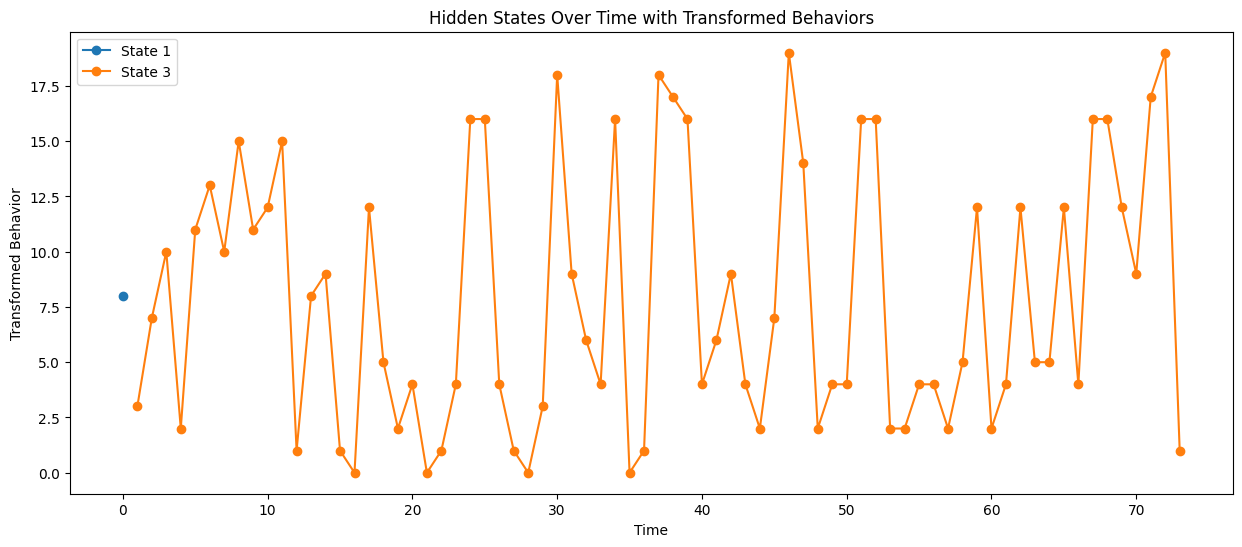

In [86]:
# attendre Thomas

# 

hidden_states = model.predict(X)
print(hidden_states)
plt.figure(figsize=(15, 6))
for state in np.unique(hidden_states):
    state_indices = np.where(hidden_states == state)[0]
    plt.plot(state_indices, X[state_indices], marker='o', linestyle='-', label=f'State {state}')

plt.title('Hidden States Over Time with Transformed Behaviors')
plt.xlabel('Time')
plt.ylabel('Transformed Behavior')
plt.legend()

In [ ]:
models_EM = models_VI = scores_EM = scores_VI = list()
states = ['Relax', 'Observation', 'Fuite', 'Reminiscence']
start_probs = np.array([1, 0, 0, 0])
for n_components in range(2, 5):
    for idx in range(10):
        model_EM = hmm.MultinomialHMM(n_components=len(states),
                                        n_trials=len(temps_annotation),
                                        n_iter=50,
                                        init_params='')
        model_EM.fit(X_head)
        models_EM.append(model_EM)

        scores_EM.append(model_EM.score(X_head))

model_EM = models_EM[np.argmax(scores_EM)]

print(f'The best EM model had a score of {max(scores_EM)} and 'f'{model_EM.n_components} components')

Z_EM = model_EM.predict(X_head)